# Projeto Sprint 10: Aprendizado Automático para Negócios

Objetivo: Como funcionário da empresa OilyGIant, encontrar os melhores lugares para a criação de novos poços de petróleo, criando um modelo que preveja os lucros de três diferentes regiões 

## Importando Bibliotecas

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from numpy.random import RandomState

## Importando os Conjuntos de Dados

In [100]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

### Verificando os Dataframes, seus tipos de Dados e Possíveis Valores Ausentes

Depois de importar os conjuntos de dados que uaremos para o projeto, vale a pena usar métodos como o head e o info, para verificarmos cada um dos dataframes. Assim, verificaremos a necessidade de qualquer pré-manipulação.

In [101]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [102]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [103]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [104]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [105]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [106]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [107]:
geo_data_0.drop(columns=['id'], inplace=True)
geo_data_1.drop(columns=['id'], inplace=True)
geo_data_2.drop(columns=['id'], inplace=True)

Aqui, percebemos que não temos dados faltantes para nenhuma coluna. O head nos indicou que os valores de f0, f1 e f2 são de ponto flutuante. O método info, indicou que todos os tipos de dados estão corretos. Como não temos o significado de cada uma dessas tabelas, embora o projeto deixe explícito que eles tem seu significado, não há porque pensar em eventuais transformações de tipos de dados. A única coisa que fizemos foi remover a coluna ID, que não terá nenhuma utilidade para o nosso trabalho. Por mais simples que tenha sido, está claro que essa etapa está concluída. Podemos avançar para a análise exploratória dos nossos dados. 

## Análise Exploratória de Dados

É um pouco difícil decidir o que podemos explorar nessa etapa, tendo em vista que temos apenas 5 colunas, sendo que uma delas apenas reflete o id do poço e outras três delas são apenas valores de dados com significado desconhecido para nós. Dessa forma, vou verificar a correlação de algumas colunas. Com um modelo treinado e com alguns resultados em mãos, caso seja necessário, podemos inferir sobre pesos que o modelo provavelmente atribuiu para cada coluna e sua real importância para o resultado. Antes disso, vamos verificar a dispersão dos dados com relação à coluna product. Isso nos indicará se há linearidade ou não dos dados.  

### Montando gráficos de Dispersão

#### geo_data_0

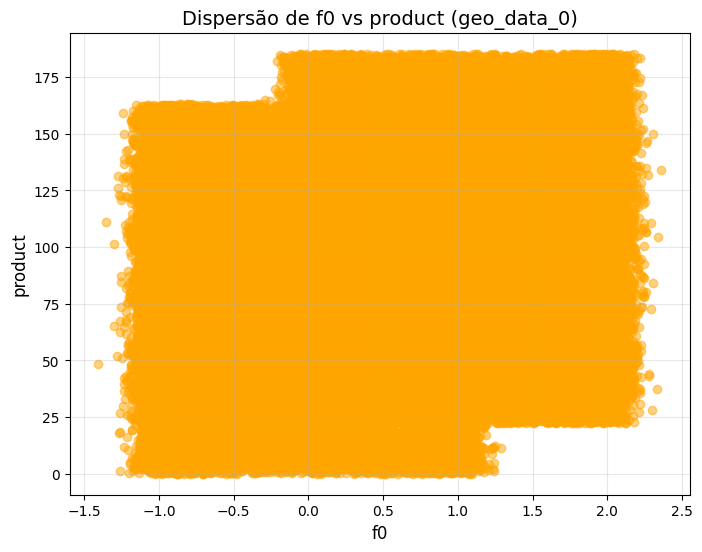

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(geo_data_0['f0'], geo_data_0['product'], alpha=0.5, color='orange')
plt.title('Dispersão de f0 vs product (geo_data_0)', fontsize=14)
plt.xlabel('f0', fontsize=12)
plt.ylabel('product', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

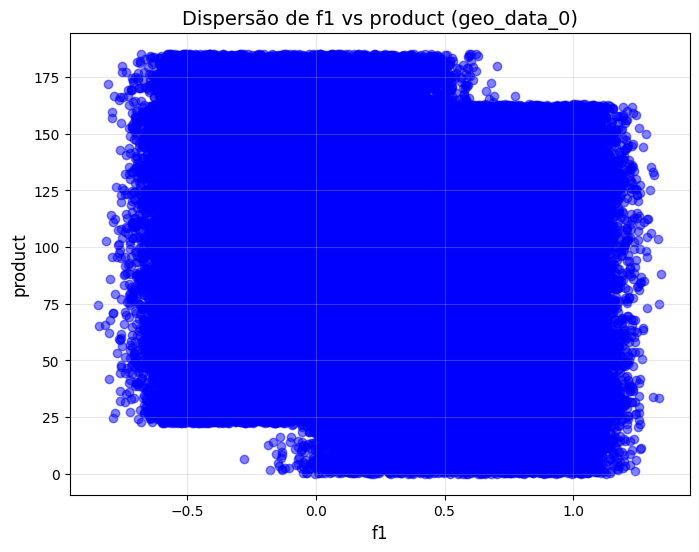

In [109]:
plt.figure(figsize=(8, 6))
plt.scatter(geo_data_0['f1'], geo_data_0['product'], alpha=0.5, color='blue')
plt.title('Dispersão de f1 vs product (geo_data_0)', fontsize=14)
plt.xlabel('f1', fontsize=12)
plt.ylabel('product', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

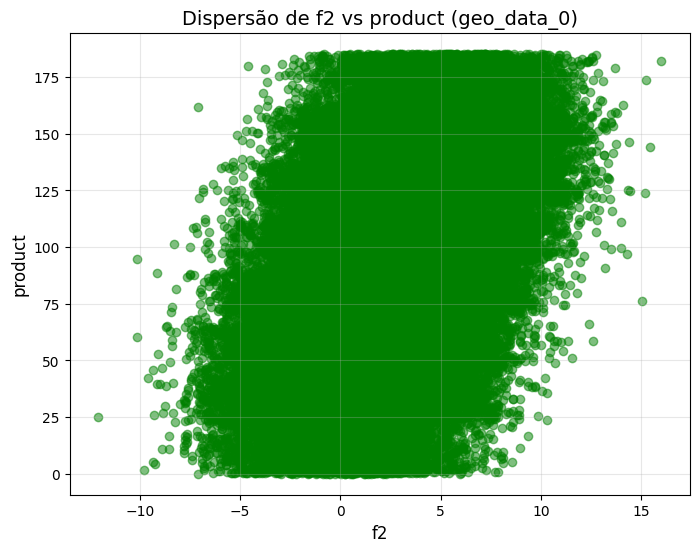

In [110]:
plt.figure(figsize=(8, 6))
plt.scatter(geo_data_0['f2'], geo_data_0['product'], alpha=0.5, color='green')
plt.title('Dispersão de f2 vs product (geo_data_0)', fontsize=14)
plt.xlabel('f2', fontsize=12)
plt.ylabel('product', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Nenhum dos três gráficos apresenta uma linearidade clara. Dessa forma, está evidente que a melhor forma de calcular a correlação para toda a tabela é usando o método de Spearman. 

#### geo_data_1

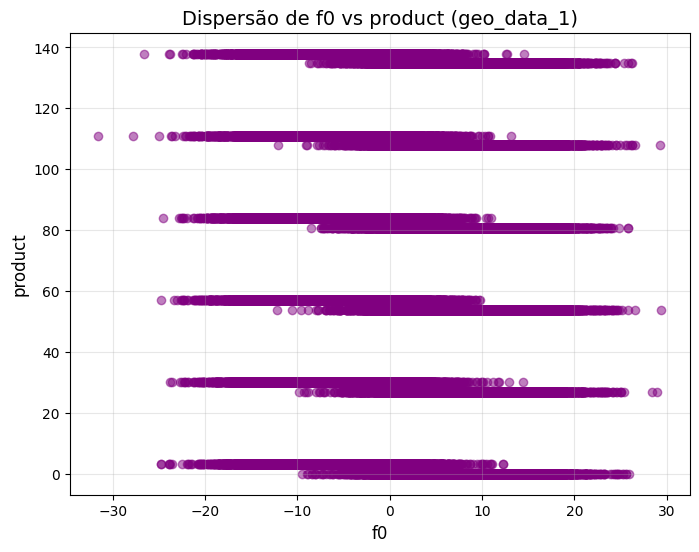

In [111]:
plt.figure(figsize=(8, 6))
plt.scatter(geo_data_1['f0'], geo_data_1['product'], alpha=0.5, color='purple')
plt.title('Dispersão de f0 vs product (geo_data_1)', fontsize=14)
plt.xlabel('f0', fontsize=12)
plt.ylabel('product', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Esse gráfico indica que os valores estão distribuídos em faixas, sem continuidade. Para esse caso, ambos os métodos de Pearson e Spearman podem não encontrar correlação. Tudo indica que essa coluna será de muita pouca importância para o modelo.

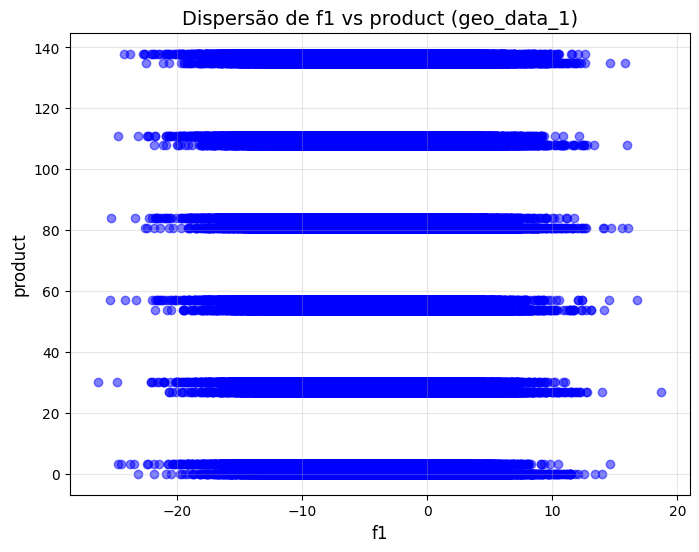

In [112]:
plt.figure(figsize=(8, 6))
plt.scatter(geo_data_1['f1'], geo_data_1['product'], alpha=0.5, color='blue')
plt.title('Dispersão de f1 vs product (geo_data_1)', fontsize=14)
plt.xlabel('f1', fontsize=12)
plt.ylabel('product', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

A mesma situação do gráfico anterior. Essa coluna também terá de pouco à nenhum impacto para o modelo. 

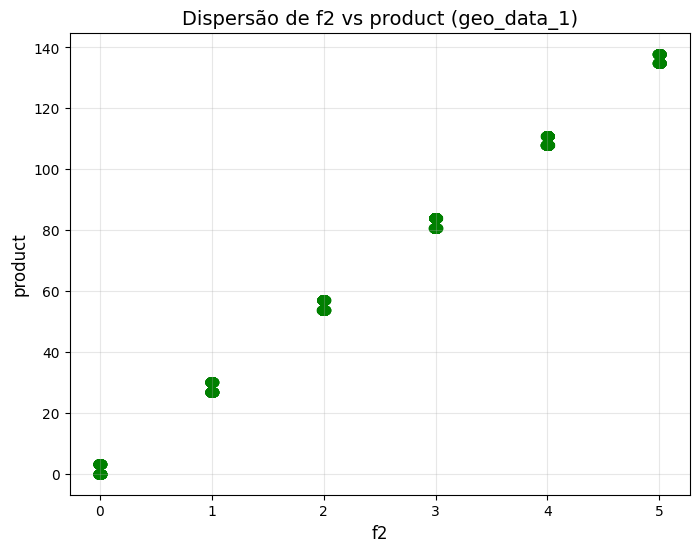

In [113]:
plt.figure(figsize=(8, 6))
plt.scatter(geo_data_1['f2'], geo_data_1['product'], alpha=0.5, color='green')
plt.title('Dispersão de f2 vs product (geo_data_1)', fontsize=14)
plt.xlabel('f2', fontsize=12)
plt.ylabel('product', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Aqui, já temos uma linearidade quase perfeita. O método Pearson será perfeito para essa correlação e essa coluna praticamente ditará as previsões do modelo.

#### Geo_data_2

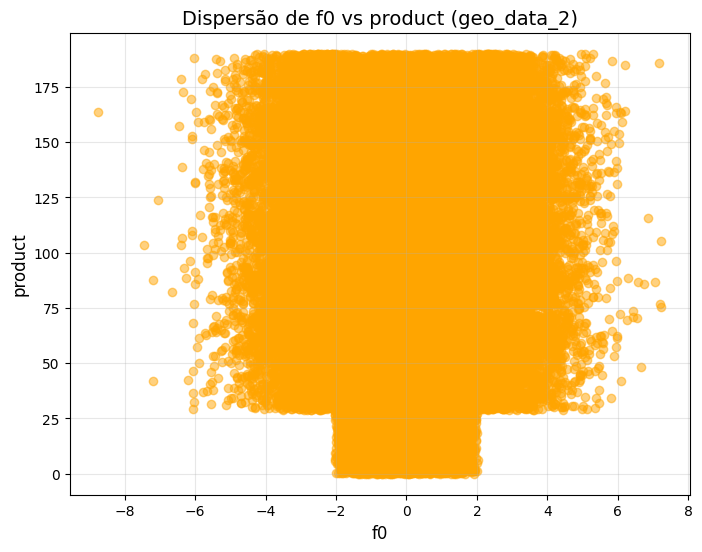

In [114]:
plt.figure(figsize=(8, 6))
plt.scatter(geo_data_2['f0'], geo_data_2['product'], alpha=0.5, color='orange')
plt.title('Dispersão de f0 vs product (geo_data_2)', fontsize=14)
plt.xlabel('f0', fontsize=12)
plt.ylabel('product', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

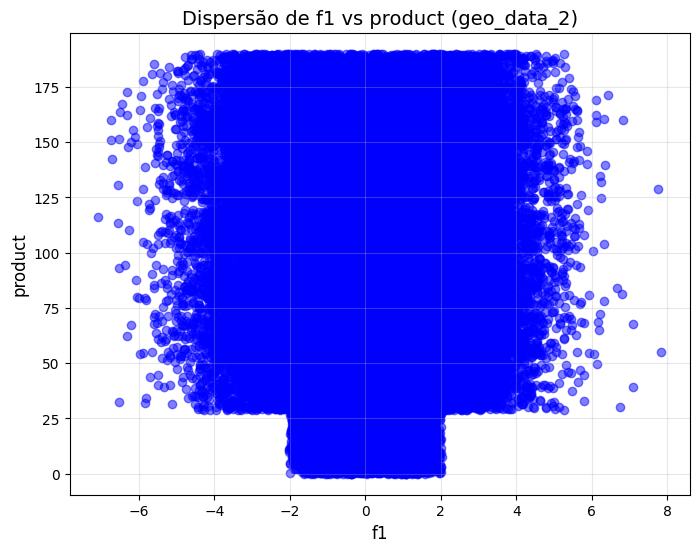

In [115]:
plt.figure(figsize=(8, 6))
plt.scatter(geo_data_2['f1'], geo_data_2['product'], alpha=0.5, color='blue')
plt.title('Dispersão de f1 vs product (geo_data_2)', fontsize=14)
plt.xlabel('f1', fontsize=12)
plt.ylabel('product', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

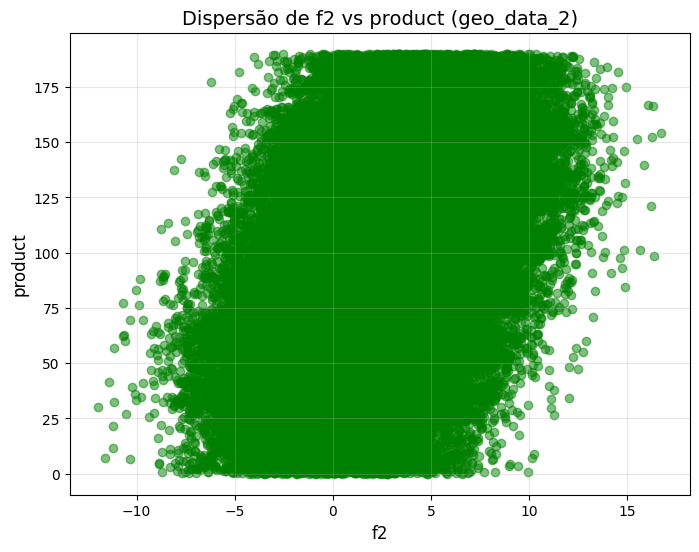

In [116]:
plt.figure(figsize=(8, 6))
plt.scatter(geo_data_2['f2'], geo_data_2['product'], alpha=0.5, color='green')
plt.title('Dispersão de f2 vs product (geo_data_2)', fontsize=14)
plt.xlabel('f2', fontsize=12)
plt.ylabel('product', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Nenhum dos gráficos apresenta uma linearidade clara. Agora, sabemos que apenas f2 da tabela geo_data_1 funcionará com o método pearson para a correlação. Também percebemos, a primeira vista, que só nessa tabela, uma coluna será claramente responsável pela determinação das predições do nosso modelo. Vamos avaliar as correlações com seus respectivos métodos e verificar se encontramos mais alguns insights.

## Analisando a Correlação das Tabelas

Vamos estabelecer a correlação das tabelas. Temos a coluna product como target, logo, uma correlação alta pode nos ajudar a determinar quais colunas vão ter mais impacto para nossos modelos. Vamos fazer as análises em cada tabela separadamente.

#### geo_data_0

In [117]:
correlation_spearman_0 = geo_data_0.corr(method='spearman')

print(correlation_spearman_0)

               f0        f1        f2   product
f0       1.000000 -0.471395 -0.002685  0.128417
f1      -0.471395  1.000000  0.001413 -0.181143
f2      -0.002685  0.001413  1.000000  0.486394
product  0.128417 -0.181143  0.486394  1.000000


Aqui, logo de cara, percebemos que a coluna f2 será a quie terá o maior impacto nos modelos, já que ela tem uma correlação positiva e moderada com product. A segunda coluna mais impactante é f0, que tem correlação fraca, mas ainda positiva. f1 apresenta correlação negativa, o que pode até atrapalhar certos modelos, mas ainda assim, correlação muito fraca. É interessante ver que f0 e f1 apresentam uma correlação negativa moderada, o que pode indicar algum tipo de relação inversa entre as duas.

#### geo_data_1

In [118]:
correlation_pearson_1 = geo_data_1.corr(method='pearson')
print("Correlação (Pearson) - geo_data_1:")
print(correlation_pearson_1)

# Calculando a correlação para geo_data_1 com o método Spearman
correlation_spearman_1 = geo_data_1.corr(method='spearman')
print("\nCorrelação (Spearman) - geo_data_1:")
print(correlation_spearman_1)

Correlação (Pearson) - geo_data_1:
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000

Correlação (Spearman) - geo_data_1:
               f0        f1        f2   product
f0       1.000000  0.182248 -0.002000 -0.122869
f1       0.182248  1.000000 -0.003678 -0.033908
f2      -0.002000 -0.003678  1.000000  0.975605
product -0.122869 -0.033908  0.975605  1.000000


Aqui, chama a atenção a correlação quase perfeita entre f2 e product, o que deixa claro que essa variável será praticamente única para o modelo treinado. As outras colunas serão praticamente descartadas. Essa tabela apresenta uma grande correlação em f2, o que indicava a necessidade do método pearso. Mas, para as outras duas colunas, me pareceu importante testar com os dois métodos para verificar as diferenças. Elas foram mínimas, então podemos seguir em frente. 

#### geo_data_2

In [119]:
correlation_spearman_2 = geo_data_2.corr(method='spearman')
print("Correlação (Spearman) - geo_data_2:")
print(correlation_spearman_2)

Correlação (Spearman) - geo_data_2:
               f0        f1        f2   product
f0       1.000000  0.002493  0.000053 -0.002464
f1       0.002493  1.000000  0.000378 -0.001463
f2       0.000053  0.000378  1.000000  0.448463
product -0.002464 -0.001463  0.448463  1.000000


Aqui, mais uma vez, está clara a importância consideravelmente maior que f2 terá no treinamoento dos modelos, considerando que a coluna apresenta uma correlação moderada e positiva com product. f0 e f1 apresentam correlações fracas e negativas eterão de pouco a nenhum impacto.

### Os diferentes impactos de f2 nas regiões

Para tornar a análise mais visualmente agradável, decidi plotar um gráfico mostrand as diferenças na importância de f2 em cada uma das três regiões. Embora não adicione nada de novo em termos de análise pura, o gráfico facilita a visualização e deixa as coisas mais visualmente apelativas.

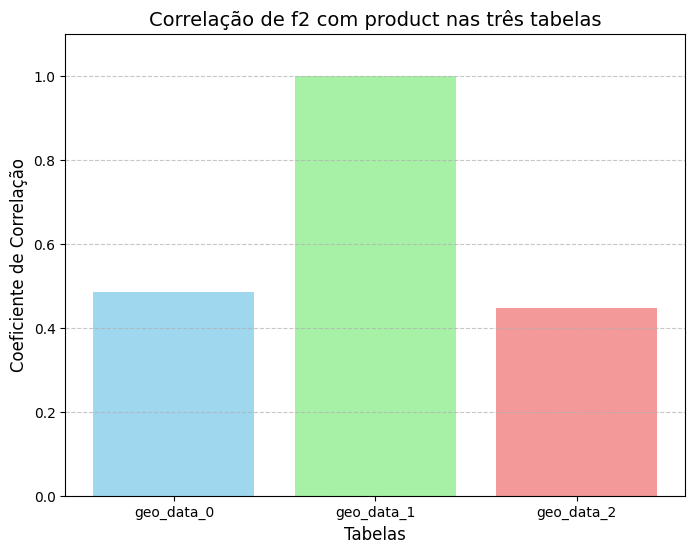

In [120]:
correlation_f2_product = {
    'geo_data_0': 0.4837,
    'geo_data_1': 0.9994,
    'geo_data_2': 0.4459
}

colors = ['skyblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(correlation_f2_product.keys(), correlation_f2_product.values(), color=colors, alpha=0.8)
plt.title('Correlação de f2 com product nas três tabelas', fontsize=14)
plt.ylabel('Coeficiente de Correlação', fontsize=12)
plt.xlabel('Tabelas', fontsize=12)
plt.ylim(0, 1.1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Aqui, reiteramos a análise feita anteriormente. f2 é predominante na predição dos modelos, com ~enfase na segunda região, onde f2 praticamente determina product. As diferenças entre os valores mostram que, muito provavelmente, veremos diferenças razoáveis nos desempenhos dos modelos para cada região. Esse gráfico foi montado usando os valores de correlação de Pearson, que eu havia calculado anteriormente. Visto que não existem grandes mudanças e que essa parte é algo mais visual do que de suporte de análise diretamente, vou manter como está. 

## Treinando o Modelo

Chegou a hora de treinar nossa regressão linear para o conjunto de dados geo_data_0, como o projeto especifica que devemos fazer. Vamos avançar!

### Dividindo o conjunto de dados em treinamento e validação

In [121]:
x = geo_data_0.drop(columns=['product'])
y = geo_data_0['product']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=12345)

### Treinando o Modelo e Salvando Predições

In [122]:
model = LinearRegression()
model.fit(x_train, y_train)

y_preds = model.predict(x_val)
rmse = mean_squared_error(y_val, y_preds) ** 0.5

print(y_preds.mean())
print(rmse)

92.59256778438035
37.5794217150813


Até aqui, tudo o que fizemos foi dividir o conjunto de dados em conjunto de teste e validação, como pedia o projeto e, então, treinar o modelo. Calculamos o volume médio da região representada em geo_data_0 e o REQM do nosso modelo.

### Criando Uma Função

In [123]:
def train_predict(geo_data, region=1):
    x = geo_data.drop(columns=['product'])
    y = geo_data['product']

    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=12345)
    
    model = LinearRegression()
    model.fit(x_train, y_train)

    y_preds = model.predict(x_val)
    rmse = mean_squared_error(y_val, y_preds) ** 0.5

    print(f'Média do Produto: {y_preds.mean()}')
    print(f'Média do Produto (target): {y_val.mean()}')
    print(f'REQM: {rmse}')
    print(f'Região (Dataframe): {region}')
    
    return pd.Series(y_preds), pd.Series(y_val.values)

In [124]:
preds_geo_data_0, target_geo_data_0 = train_predict(geo_data_0, 0)

Média do Produto: 92.59256778438035
Média do Produto (target): 92.07859674082927
REQM: 37.5794217150813
Região (Dataframe): 0


Aqui, tudo o que fizemos foi copiar os passos de divisão de dados em conjuntos, o treinamento e os cálculos e colocálos dentro de uma função. Esse passo vai otimizr quaisquer futuros treinamentos, como o projeto prevê que façamos.

### Usando a Função Para outras Regiões

In [125]:
preds_geo_data_1, target_geo_data_1 = train_predict(geo_data_1, 1)

Média do Produto: 68.728546895446
Média do Produto (target): 68.72313602435997
REQM: 0.893099286775617
Região (Dataframe): 1


In [126]:
preds_geo_data_2, target_geo_data_2 = train_predict(geo_data_2, 2)

Média do Produto: 94.96504596800489
Média do Produto (target): 94.88423280885438
REQM: 40.02970873393434
Região (Dataframe): 2


Com a função criada e operando, com uma linha de código, nós temos os cálculos necessários para as duas outras regiões. Fica evidente a diferença do REQM da Região 1 para as demias. Isso se deve à correlação extremamente forte da coluna f2 com product naquela região. Isso foi algo previsto por nós durante os testes de correlação e que ficou evidenciado aqui. Com a correlação quase perfeita (no caso daquela região) e com a já esperada dominãncia de f2 na predição do modelo para todos os conjuntos de dados, o REQM muda drásticamente. 

### Verificando a Necessidade de Escalabilidade nos Dados

Vamos usar esse tópico para verificar se temos valores diferentes no treinamento de um modelo quando usamos dados com escalabilidade. A regressão linear lida muito bem com escalas diferentes pros dados, então o esperado é que o resultado não sofra grandes alterações. 

In [139]:
x_scaled = geo_data_0.drop(columns=['product'])
y_scaled = geo_data_0['product']

# Dividindo em treinamento e validação
x_train_scaled, x_val_scaled, y_train_scaled, y_val_scaled = train_test_split(
    x_scaled, y_scaled, test_size=0.25, random_state=12345
)

# Aplicando escalabilidade
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_scaled)
x_val_scaled = scaler.transform(x_val_scaled)

# Treinando o modelo
model_scaled = LinearRegression()
model_scaled.fit(x_train_scaled, y_train_scaled)

# Fazendo predições
y_preds_scaled = model_scaled.predict(x_val_scaled)

# Calculando o RMSE
rmse_scaled = mean_squared_error(y_val_scaled, y_preds_scaled) ** 0.5

# Exibindo os resultados
print(f'Média das Predições (escalado): {y_preds_scaled.mean()}')
print(f'Média do Produto (target escalado): {y_val_scaled.mean()}')
print(f'REQM (escalado): {rmse_scaled}')

Média das Predições (escalado): 92.59256778438035
Média do Produto (target escalado): 92.07859674082927
REQM (escalado): 37.5794217150813


Aqui, repetimos todo o processo de separação dos dados e treinamento do modelo com escalabilidade. Como imaginávamos, o resultado é praticamente o mesmo, o que confirma a ideia de que é desnecessário aplicar escalabilidade nos dados. A regressão linear vai trabalhar da mesma forma sem isso.

## Preparando o Cálculo de lucro

Para fazer os cálculos de lucro, é bom termos alguns valores em mente. o projeto ainda nos pede para separar tais valores em variáveis diferentes. Então, aqui vamos:

In [127]:
orcamento = 100_000_000
custo_por_poco = 500_000
pocos_totais = orcamento  // custo_por_poco
retorno_barril = 4_500
break_even = (orcamento / pocos_totais) / retorno_barril

print(pocos_totais)
print(break_even)

200
111.11111111111111


### Selecionando os Melhores Poços Baseado nas Predições

In [128]:
preds_sorted = preds_geo_data_0.sort_values(ascending=False)
pocos_selecionados = target_geo_data_0.iloc[preds_sorted.index][:pocos_totais]
pocos_selecionados

9317     162.810993
219      153.639837
10015    162.153488
11584     96.893581
23388    178.879516
            ...    
7888     179.683422
7890      95.396917
24051    160.361464
24160    102.186603
20340    119.890261
Length: 200, dtype: float64

Até aqui, separamos algumas variáveis que nos serão úteis para os cálculos e fizemos a separação dos 200 melhores poços da região representada por geo_data_0. O próximo passo é ver quanto petróleo esses 200 poços vão gerar para a empresa e determinar a receita total.

In [129]:
produto_total = pocos_selecionados.sum()

receita = produto_total * retorno_barril
custo = orcamento
receita - custo

33208260.43139851

Segundo nossos calculos, caso a região representada por geo_data_0 seja escolhida, a receita total gerada seria de 133.208.260,43 aproximadamente. O lucro obtido na região seria de 33.2 milhões de dólares. Alguém vai ganhar dinheiro, mas será que dá para ganhar ainda mais? Veremos.  

### Criando uma Função para Calcular o Lucro

In [130]:
def profit_calculation(preds_geo_data, target_geo_data, pocos_totais=pocos_totais, retorno_barril=retorno_barril, orcamento=orcamento):
    preds_sorted = preds_geo_data.sort_values(ascending=False)
    pocos_selecionados = target_geo_data[preds_sorted.index][:pocos_totais]
    
    produto_total = pocos_selecionados.sum()

    receita = produto_total * retorno_barril

    custo = orcamento
    
    return receita - custo

Criamos nossa função e parece ter funcionado corretamente. Deixamos o código robusto ao incrementar os parâmetros e garantir que a função buscasse 0os valores nas variáveis que criamos anteriormente. Agora, para fazê-la funcionar, só precisamos da predição e do target de cada região. Felizmente, nossa primeira função já nos retorna esses valores.

### Calculando Lucros e Tirando Conclusões

In [131]:
print(profit_calculation(preds_geo_data_0, target_geo_data_0))
print(profit_calculation(preds_geo_data_1, target_geo_data_1))
print(profit_calculation(preds_geo_data_2, target_geo_data_2))

33208260.43139851
24150866.966815114
27103499.635998324


A resposta para a pergunta do tópico 6.1, até aqui, é: não. Não dá para ganahr mais. Fizemos o cálculo do lucro de cada uma das regiões e vimos que a primeira delas é aquela que apresenta o maior lucro. Se nosso trabalho terminasse aqui, a indicação seria para que o investimento fosse feito na região representada por geo_data_0. Mas nosso trabalho não termina aqui...

## Calculando Riscos para Cada Região

Para essa etapa, o projeto nos pede para calcular os riscos de cada região usando a técnica de bootstrap. Nosso número de amostras é 1000, nosso intervalo de confiança é de 95%. Vamos começar:

In [134]:
bootstrap_size = 1000
sample_size = 500
state = RandomState(12345)

def risk_calculation(target_geo_data, preds_geo_data, regiao=1):
    profit_list = []
    for i in range(bootstrap_size):
        target_sample = target_geo_data_0.sample(sample_size, replace=True, random_state=state)
        predictions_sample = preds_geo_data_0[target_sample.index]
        simu_profit = profit_calculation(predictions_sample, target_sample)
        profit_list.append(simu_profit)

    prof_series = pd.Series(profit_list)
    
    print(f'Região: {regiao}')
    print(prof_series.mean())
    print(prof_series.quantile(0.025), prof_series.quantile(0.975))

    neg_prof_prob = (prof_series < 0).mean()
    print(f'risco: {neg_prof_prob*100}')
    

Aqui, criamos um bootstrap para para calcular os riscos de perda de cada região, como o projeto nos pedia e colocamos todo o processo dentro de uma função, para que o risco fosse calculado para todas as tr~es regiões. Nos resta chamar a função e verificar os resultados e verificar os riscos.

In [138]:
risk_calculation(target_geo_data_0, preds_geo_data_0, regiao=0)
risk_calculation(target_geo_data_1, preds_geo_data_1, regiao=1)
risk_calculation(target_geo_data_2, preds_geo_data_2, regiao=2)

Região: 0
4177386.4108921066
-1304894.458159222 9515257.49781208
risco: 6.6000000000000005
Região: 1
4053242.9146677917
-1159567.1442428168 9448757.78890856
risco: 6.2
Região: 2
4251838.49499801
-1206640.9618031057 9880069.375484936
risco: 6.9


Aqui, percebemos a grande diferença. na primeira avaliação, a região 1 seria a indicada para a exploração. Mas com o cálculo dos riscoss através do Bootstrap, percebemos que nenhuda das três bate os requisitos esperados, que eram inferiores a 2.5%. Logo, não haveria região segura para realizar a exploração. 

## Conclusão Final

Chegamos ao fim de mais um projeto. Esse, até aqui, o mais complicado de longe. Nosso primeiro desafio vai pensar a melhor forma de lidar com colunas de dados cujo significado é desconhecido e entender que tipo de exploração poderíamos fazer, buscando insights sobre as futuras conclusões da nossa regressão. Verificamos a dispersão e a correlação das tabelas. Com o nosso resultado pudemos verificar características que se refletiriam nos REQMs futuros.

O treino do modelo foi a parte mais direta de todo o projeto. Preparamos um modelo de Regressão Linear, que, como previsto, se tornou bem dependente da coluna f2 e de ssuas correlações com a nossa variável target para funcionar. Também verificamos a possível necessidade de escalabildiade de dados. Com0o os resultados permaneceram praticamente iguais, seguimos sem a aplicação desse parâmetro. Até aqui, a região escolhida para a exploração seria àquela representada por geo_data_0, a "primeira" região do nosso trabalho.

Por fim, preparamos uma função com um bootstrap para determinbar os riscos de perda de dinheiro com a exploração das regiões. Mantivemos as métricas exatamente iguais ao que era solicitado pelo projeto e conferimos que nenhuma das três operaria com um risco inferior ao que foi solicitado. Se esse risco de 2.5 for fator determinante para empresa, nenhuma das tr~es regiões seria explorada. 